# Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure

Dans ce notebook nous reproduisons une partie des analyses produites dans *Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure* by *Siddhartha R. Dalal, Edward B. Fowlkes, Bruce Hoadley* published in *Journal of the American Statistical Association*, Vol. 84, No. 408 (Dec., 1989), pp. 945-957 et disponible ici [http://www.jstor.org/stable/2290069](http://www.jstor.org/stable/2290069). 

Dans la quatrième page de cet article, ils indiquent notamment que l'estimation du maximum de vraisemblance sur la régression logistique se basant uniquement sur la température est : $\hat{\alpha}=5.085$ et $\hat{\beta}=-0.1156$.
Leur erreur asymptotique est $s_{\hat{\alpha}}=3.052$ et $s_{\hat{\beta}}=0.047$. La qualité de l'ajustement pour ce modèle est $G^2=18.086$ avec 21 degrés de liberté. Nous allons essayer de reproduire ces résultats et une partie des figures présentes dans l'article.

## Description technique de l'ordinateur sur lequel est réalisé cette expérience

Nous utilisons Python3 sous windows, et essentiellement les librairies pandas, statsmodels, numpy, matplotlib et seaborn.

In [13]:
def print_imported_modules():
    import sys
    for name, val in sorted(sys.modules.items()):
        if(hasattr(val, '__version__')): 
            print(val.__name__, val.__version__)
#        else:
#            print(val.__name__, "(unknown version)")
def print_sys_info():
    import sys
    import platform
    print(sys.version)
    print(platform.uname())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

print_sys_info()
print_imported_modules()

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
uname_result(system='Windows', node='DESKTOP-LIEPQJ9', release='10', version='10.0.19041', machine='AMD64', processor='Intel64 Family 6 Model 142 Stepping 12, GenuineIntel')
IPython 8.6.0
IPython.core.release 8.6.0
PIL 9.2.0
PIL.Image 9.2.0
PIL._deprecate 9.2.0
PIL._version 9.2.0
_csv 1.0
_ctypes 1.1.0
decimal 1.70
_pydev_bundle.fsnotify 0.1.5
_pydevd_frame_eval.vendored.bytecode 0.13.0.dev
argparse 1.1
backcall 0.2.0
bottleneck 1.3.5
cffi 1.15.1
colorama 0.4.5
csv 1.0
ctypes 1.1.0
cycler 0.10.0
dateutil 2.8.2
debugpy 1.5.1
decimal 1.70
decorator 5.1.1
defusedxml 0.7.1
distutils 3.8.5
executing 0.8.3
executing.version 0.8.3
http.server 0.6
ipykernel 6.15.2
ipykernel._version 6.15.2
ipython_genutils 0.2.0
ipython_genutils._version 0.2.0
ipywidgets 7.6.5
ipywidgets._version 7.6.5
jedi 0.18.1
joblib 1.1.1
joblib.externals.cloudpickle 2.0.0
joblib.externals.loky 3.0.0
json 2.0.9
jupyter_client 6.1.12
jupyter_client._version

## Chargement et inspection des données


In [14]:
data = pd.read_csv("data_shuttle.csv", sep=',', encoding='utf-8')
data

Date  Count  Temperature  Pressure  Malfunction
0     4/12/81      6           66        50            0
1    11/12/81      6           70        50            1
2     3/22/82      6           69        50            0
3    11/11/82      6           68        50            0
4     4/04/83      6           67        50            0
5     6/18/82      6           72        50            0
6     8/30/83      6           73       100            0
7    11/28/83      6           70       100            0
8     2/03/84      6           57       200            1
9     4/06/84      6           63       200            1
10    8/30/84      6           70       200            1
11   10/05/84      6           78       200            0
12   11/08/84      6           67       200            0
13    1/24/85      6           53       200            2
14    4/12/85      6           67       200            0
15    4/29/85      6           75       200            0
16    6/17/85      6           70       200            0
17  7/2903/85      6           81       200            0
18    8/27/85      6           76       200            0
19   10/03/85      6           79       200            0
20   10/30/85      6           75       200            2
21   11/26/85      6           76       200            0
22    1/12/86      6           58       200            1

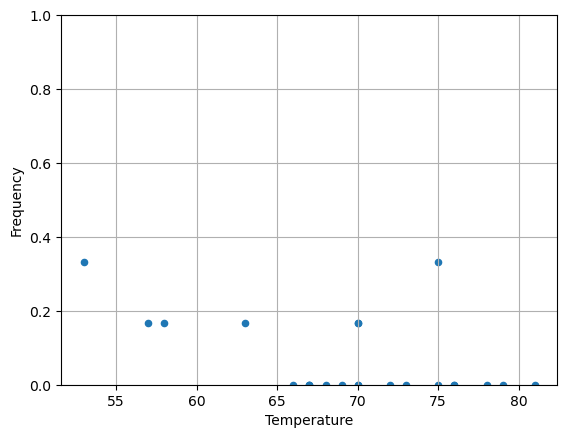

In [15]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data["Frequency"]=data.Malfunction/data.Count
data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

## Régression logistique

On assume que les joints toriques défaillent indépendamment avec la même probabilité, qui dépend uniquement de la température. Une régression logistique va nous permettre d'estimer l'influence de cette dernière.

In [16]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1

logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], 
                family=sm.families.Binomial(sm.families.links.logit())).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Thu, 13 Jul 2023   Deviance:                       3.0144
Time:                        15:31:34   Pearson chi2:                     5.00
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04355
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004      0.316      -0.341       0.110
===============================================================================
"""

L'estimation du maximum de vraisemblance de l'intercept et de la température sont donc $\hat{\alpha}=5.0850$ et $\hat{\beta}=-0.1156$. Cela correspond bien aux valeurs de l'article (à un arrondi près). Les erreurs sont $s_{\hat{\alpha}} = 7.477$ et $s_{\hat{\beta}} = 0.115$, ce qui est différent des valeurs de l'article ($3.052$ and $0.04702$). 
La déviation est de $3.01444$ avec 21 degrés de liberté. C'est encore une fois différent. Il est nécessaire de spécifier que chaque observation correspond en réalisté à 6 observations pour chaque lancer de fusée. Cela peut modifier la variance de l'estimation.

In [17]:
logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], 
                family=sm.families.Binomial(sm.families.links.logit()),
                var_weights=data['Count']).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.526
Date:                Thu, 13 Jul 2023   Deviance:                       18.086
Time:                        15:31:36   Pearson chi2:                     30.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2344
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      3.052      1.666      0.096      -0.898      11.068
Temperature    -0.1156      0.047     -2.458      0.014      -0.208      -0.023
===============================================================================
"""

On retrouve alors bien les bonnes erreurs asymptotiques $s_{\hat{\alpha}}=3.052$ et $s_{\hat{\beta}}=0.047$.
La qualité de l'ajustement est alors de $G^2=18.086$ avec 21 degrés de liberté.

**Nous avons ainsi complètement reproduit les résultats de l'article de Dalal *et al.***.

In [27]:
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
logmodel

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

## Prédiction de la probabilité de défaillance
La température au moment du lancement était de 31°F. Essayons d'estimer la probabilité de défaillance pour une telle température en utilisant notre modèle :


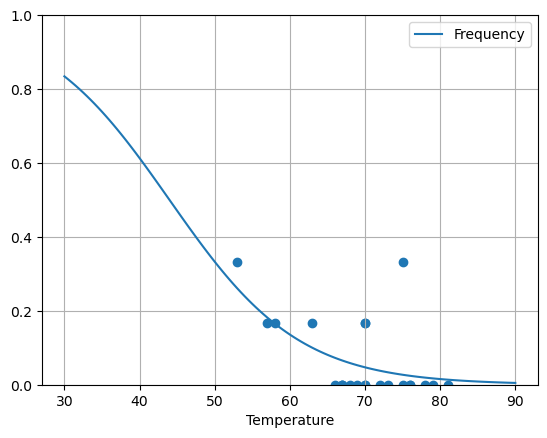

In [32]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred[['Intercept', 'Temperature']])
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

Ce graphique est identique à la Figure 4 de of Dalal *et al.* **J'ai réussi à la reproduire**

## Calculer et afficher l'incertitude

A partir de la documentation [Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html), j'utilise regplot.

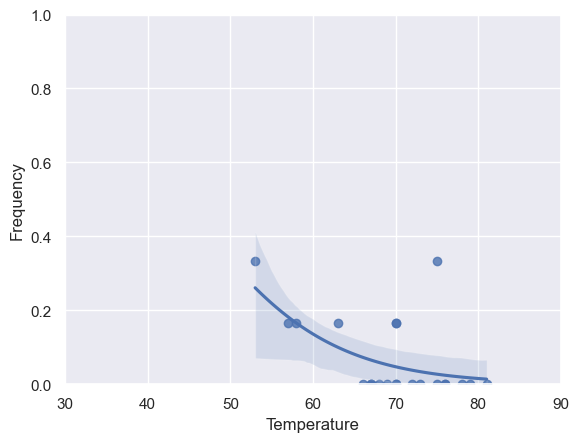

In [35]:
sns.set(color_codes=True)
plt.xlim(30,90)
plt.ylim(0,1)
sns.regplot(x='Temperature', y='Frequency', data=data, logistic=True)
plt.show()

**Je pense avoir réussi à calculer et afficher correctement le graphe d'incertitude de ma prédiction.**